# Проверка гипотез для увеличения выручки

**Цель исследования:** приоритизировать гипотезы, проанализировать результаты А/B теста для увеличения выручки. 

**Имеющиеся данные:** 9 гипотез по увеличению выручки интернет-магазина, результаты А/B теста.

**План работы:**

- подготовка данных;
- приоритизация гипотез фреймворками ICE и RICE;
- расчет и анализ кумулятивных метрик;
- анализ выбросов и аномальных значений;
- анализ А/В теста, расчет статистической значимости различий;
- выводы и предположения.

    

### Приоритизация гипотез.

Подготовим данные, приоритизируем гипотезы используя фреймворки ICE и RICE, сделаем выводы.

#### Подготовка данных

Импортируем все необходимые библиотеки, сохраним датасеты в переменные, изучим общий вид и информацию по таблицам.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') #сохраняем данные о гипотезах

# изменим параметры отображения
pd.options.display.max_colwidth = 350

hypothesis #смотрим общий вид датасета

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower() # приводим название колонок к нижнему регистру

In [4]:
hypothesis.info() # проверим информацию о количестве, типе данных и пропусках.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропущенных значений в данных нет. Типы данных верные. Наименование колонок привели к нижнему регистру.

#### Применение фреймворка ICE для приоритизации гипотез.

Используя имеющееся данные:

- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

Рассчитаем ICE SCORE.

In [5]:
#рассчитаем ICE SCORE, округлим до 2-х знаков
hypothesis['ice'] =  round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'],2) 


#сделаем сортировку по убыванию ice и выведем на экран
hypothesis.sort_values(by = 'ice',ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наиболее перспективные гипотезы 8, 0 и 7. Они имеют высокие показатели impact и confidence, то есть с большей уверенностью окажут ощутимое влияние на пользователей. При этом имеют средний уровень сложности тестирования гипотезы.

#### Применение фреймворка RICE для приоритизации гипотез.

Добавим к расчету ICE SCORE дополнительный параметр:

Reach — скольких пользователей затронет изменение, которое вы хотите внести;

И рассчитаем RICE SCORE.

In [6]:
#рассчитаем RICE SCORE
hypothesis['rice'] =  hypothesis['impact']*hypothesis['confidence']*hypothesis['reach']/hypothesis['efforts']
#сделаем сортировку по убыванию rice и выведем на экран
hypothesis.sort_values(by = 'rice',ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Наиболее перспективные гипотезы 7, 2 и 0. Гипотеза 7 имеет все высокие показатели, при этом имеет средний уровень сложности тестирования гипотезы. Гипотеза 2 затронет большое число пользователей, имет высокую степень уверености в результате и не высокую сложность проверки, но не окажет большого влияния на пользователей. Гипотеза 0 с большой степенью уверенности окажет большое влияние на пользователей, но доля таких пользоватлей не большая. 

#### Вывод

Проведена подготовка данных к анализу. Пропущенных значений в данных нет. Типы данных верные. Наименование колонок привели к нижнему регистру.

Были расчитаны:

- ICE SCORE. По результатам приоритетны для проверки гипотезы 8, 0 и 7.
- RICE SCORE. По результатам приоритетны для проверки гипотезы 7, 2 и 0.

Результаты отличаются, так как в расчете ICE SCORE учитывается сила изменений, степень уверенности в том, что гипотеза верна и сложность проверки гипотезы. В расчете RICE SCORE также дополнительно учитывается доля пользователей, которую затронет изменение. 

По результатам двух оценок, приоритетной для проверки можно посчитать гипотезу 7, она имеет высокие показатели силы изменений, степени уверенности в том, что гипотеза верна и высокую долю пользователей, которых изменения затронут. При этом сложность проверки гипотезы средняя. 




### Расчет кумулятивных метрик.

Для анализа A/B-теста построим графики: кумулятивной выручки по группам, кумулятивного среднего чека по группам, кумулятивного среднего количества заказов на посетителя по группам, а также графики относительного изменения кумулятивного среднего чека группы B к группе A и среднего количества заказов на посетителя группы B к группе A.
Посмотрим динамику и сделаем выводы.

#### Подготовка данных

Сохраним датасеты в переменные, изучим общий вид и информацию по таблицам, проверим типы данных и приведем к нужному формату.

In [7]:
orders = pd.read_csv('/datasets/orders.csv')  #сохраняем данные о заказах
visitors = pd.read_csv('/datasets/visitors.csv') #сохраняем данные о посетителях
display(orders.head(5)) #смотрим общий вид датасета
display(visitors.head(5))#смотрим общий вид датасета

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
# проверим информацию о количестве, типе данных и пропусках
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d')) # переведем данные в формат даты
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d')) # переведем данные в формат даты
orders = orders.rename(columns = {'transactionId':'transaction_id','visitorId':'visitor_id'}) # приводим название колонок к "змеиному" регистру

In [10]:
# проверяем внесенные изменения
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [11]:
# проверим наличие явных дублкатов
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

Для численных данных посмотрим на их статистические показатели и проверим их на наличие ошибок или аномалий.

In [12]:
display (orders['revenue'].describe())
display (visitors['visitors'].describe())

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

В показателях выручки максимальное значение сильно больше 75% процентиля, возможны выбросы, нужно проверить на следующих этапах.

Проверим временной интервал имеющихся данных на наличие ошибок.

In [13]:
display(orders['date'].min())
display(orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [14]:
display(visitors['date'].min())
display(visitors['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Ошибок во временном интервале нет.

Проверим количество поситителей группы A и В, чтобы убедиться в равенстве групп. 

In [15]:
visitors.groupby('group').agg({'visitors':'sum'})

,visitors
group,
A,18736
B,18916


Разница между группами менее 1 %.

Найдем количество уникальных пользователей в общем, и в каждой группе. Проверим, чтобы не было пользоватлей попавших в обе группы.

In [16]:
# найдем общее число уникальных пользователей
orders['visitor_id'].nunique()

1031

In [17]:
# число уникальных пользователей группы А
visitors_a_nunique = orders[orders['group'] == 'A'][['visitor_id']]

# число уникальных пользователей группы В
visitors_b_nunique = orders[orders['group'] == 'B'][['visitor_id']]

# число пересекающихся пользователей 
display(visitors_b_nunique.query('visitor_id in @visitors_a_nunique["visitor_id"]').nunique()) 
# процент пересекающихся пользователей 
display(visitors_b_nunique.query('visitor_id in @visitors_a_nunique["visitor_id"]').nunique()/orders['visitor_id'].nunique() * 100)

visitor_id    58
dtype: int64

visitor_id    5.625606
dtype: float64

В группах есть 58 пересекающихся пользователей, что составляет 5,62%. Несмотря на то, что это большое количество пользователей, их лучше удалить. Так как они работали с обоими версиями интернет-магазина в ходе одного исследования, неизвестно, какая именно повлияла на  их решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

In [18]:
# список пересекающихся пользователей для удаления
visitors_to_delete = orders[
    lambda x: x.index.isin(
    orders[orders['group'] == 'A']['visitor_id'].isin(
    orders[orders['group'] == 'B']['visitor_id'])[lambda x:x].index)]['visitor_id'].unique()
# исключаем пересекающихся пользователей.
orders = orders.query('visitor_id not in @visitors_to_delete')

# проверям число уникальных пользователей
orders['visitor_id'].nunique()

973

Данные проверены, дубликатов и пропусков нет. Типы данных приведены к нужному формату. Исправлены наименование столбцов. 

- возможны аномальные значения выручки, на которые нужно обратить внимания при дальнейшем анализе.
- из данных исключено 58 пользователей(5,62% от общего числа) в связи с тем, что они попали в обе исследуемые группы.

Необходимо проверить как происходит деление трафика. В связи с удалением части данных, результаты могут быть искажены.

#### График кумулятивной выручки по группам.

Построим график кумулятивной выручки по группам А и B и сделаем выводы.

In [19]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (
    dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = (
    dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


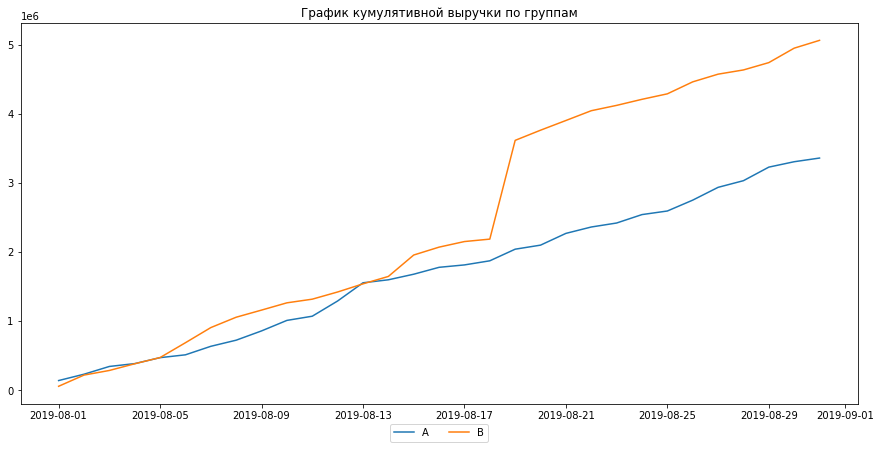

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue','orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue','orders']]

# задаем размер графика
plt.figure(figsize=(15, 7))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')

plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.04), ncol=2)
    
plt.show()

Выручка равномерно увеличивается в течении всего теста в обоих группах. При этом выручка группы B стабильно превышает выручку группы A. График выручки группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Возможно связано в аномально высоким заказом, который мы видели на предварительной обработке данных. Необходимо в дальнейшем проанализировать выбросы.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ График построен верно и можем зафиксировать аномалию в группе В.
</div>

#### График кумулятивного среднего чека по группам.

Построим график кумулятивного среднего чека по группам и сделаем выводы.

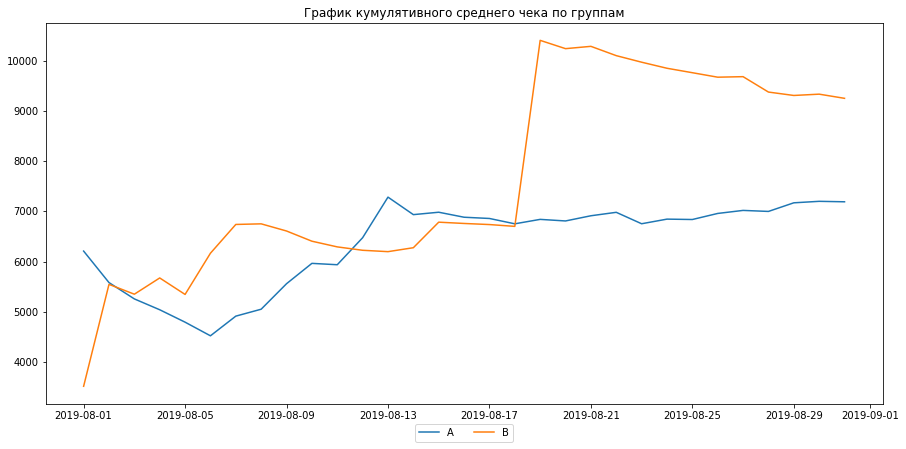

In [21]:
# задаем размер графика
plt.figure(figsize=(15, 7))

# построим график среднего чека, разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')

plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.04), ncol=2)
    
plt.show()

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике, тот же что и на выручке). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

####  График относительного изменения кумулятивного среднего чека группы B к группе A.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A и сделаем выводы.

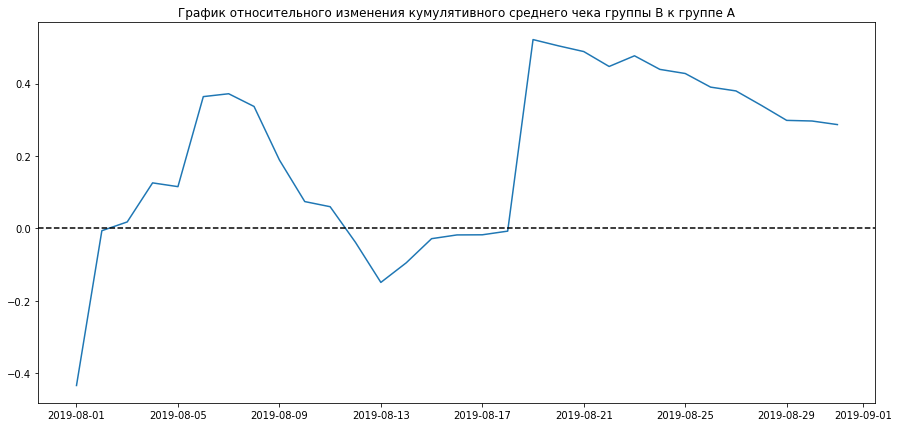

In [22]:
# собираем данные в одном датафрейме
merged_сumulative_revenue = (
    cumulative_revenue_a
    .merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# задаем размер графика
plt.figure(figsize=(15, 7))

# cтроим отношение средних чеков
plt.plot(merged_сumulative_revenue['date'], (merged_сumulative_revenue['revenueB']/merged_сumulative_revenue['ordersB'])/(merged_сumulative_revenue['revenueA']/merged_сumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

    
plt.show()

В нескольких точках график различия между сегментами резко «скачет», что может быть связано с аномально крупными заказами.

#### График кумулятивного среднего количества заказов на посетителя по группам.

Построим график кумулятивного среднего количества заказов на посетителя по группам и сделаем выводы.

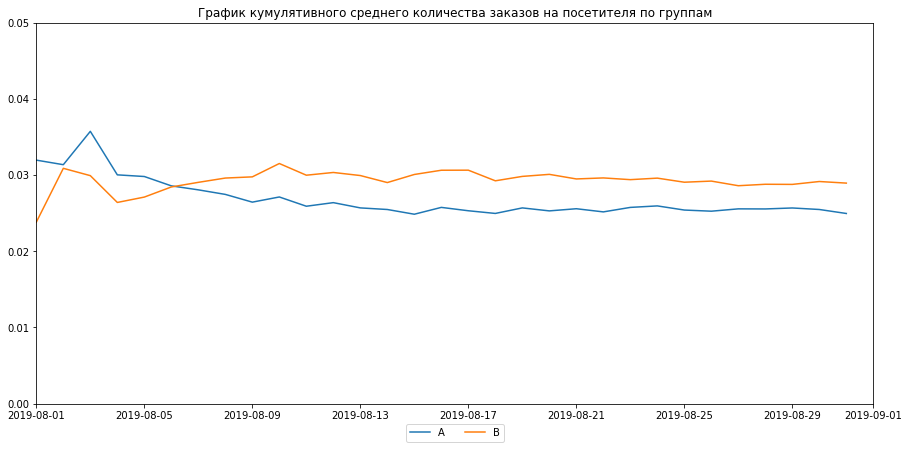

In [23]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

#задаем размер графика
plt.figure(figsize=(15, 7))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')


# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1),0,0.05])

plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.04), ncol=2)

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
    
plt.show()

Были колебания в начале графика, затем количество заказов обоих групп зафиксировалось  и число заказов группы В стабильно выше заказов группы А.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A и сделаем выводы.

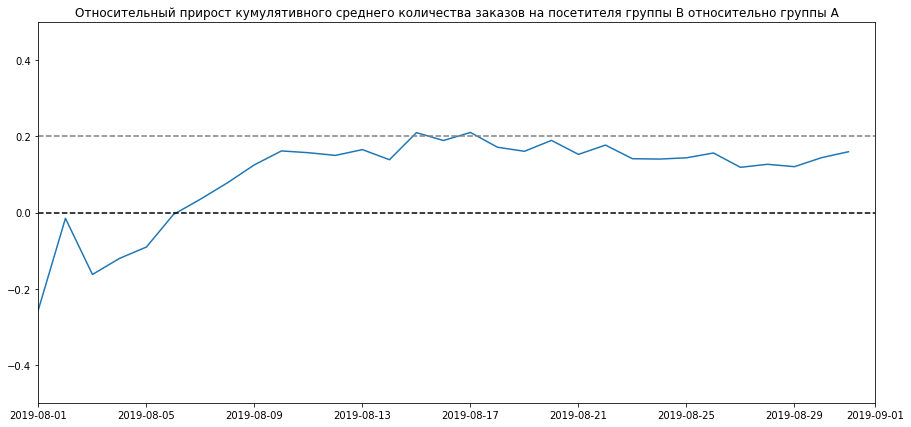

In [24]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = (
    cumulative_data_a[['date','conversion']]
    .merge(cumulative_data_b[['date','conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A','B'])
)

#задаем размер графика
plt.figure(figsize=(15, 7))

# строим отношение среднего количества заказов
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
    
plt.axhline(y= 0.2, color='grey', linestyle='--')
    
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])

plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
    
plt.show()

Почти с начала теста среднее количество заказов группы В стабильно превышает количество заказов группы А на примерно 10-20%.

**Вывод:** На основании построенных графиков можно сделать вывод, что все показатели группы В превышают показатели группы А. У группы В кумулятивная средняя выручка, средний чек и количество заказов стабильно выше, чем у группы А. При этом на графиках выручки и среднего чека есть колебания, вероятно связанные с аномально крупными заказами. Необходимо провести анализ выбросов и аномальных значений.

### Анализ выбросов. Определение аномальных значений.

Построим графики распределения количества заказов по пользователям и стоимости заказов. Опредеоим 95 и 99 процентили, проанализруем и определим выбросы и аномальные значения.

#### Распределение заказов по пользователям.


Построим точечный график количества заказов по пользователям и сделаем выводы.
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [25]:
#группируем данные по пользователям и считаем количество заказов
orders_by_users = orders.groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']

#отсортируем данные по убыванию числа заказов
orders_by_users.sort_values(by = 'orders', ascending = False).head(10)


,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Есть 7 пользователей с числом заказов 3 штуки. Посмотрим распределение на графике.

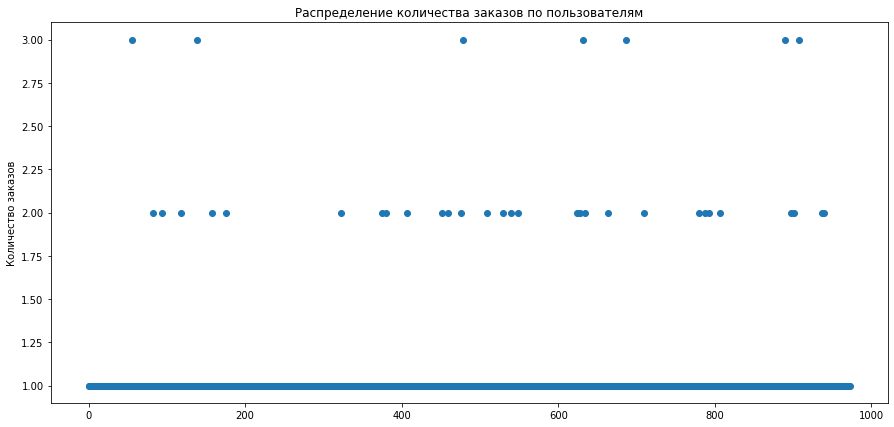

In [26]:
# задаем значение оси х
x_values = pd.Series(range(0,len(orders_by_users)))

#задаем размер графика
plt.figure(figsize=(15, 7))

# построим точечный график
plt.scatter(x_values, orders_by_users['orders']) 

plt.title('Распределение количества заказов по пользователям')


plt.ylabel('Количество заказов')
    
plt.show()


Большиство пользователей оформляли 1 или 2 заказа. Есть небольшое число пользователей с тремя заказами.

Посчитаем 95-й и 99-й перцентиль количества заказов на одного пользователя.

In [27]:
# 95,99 перцентиль количестсва заказов
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

95 % всех клиентов имеют не больше 1 заказа и 99% клиентов заказывали не более 2-х раз. Определим количество заказов не более 2 для отсечения аномальных пользователей.

#### Распределение стоимости заказов.

Построим точечный график стоимостей заказов и сделаем выводы.
Посчитаем 95-й и 99-й перцентили стоимости одного заказа. Выберем границу для определения аномальных пользователей.

In [28]:
#отсортируем данные по убыванию стоимости заказа
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


Есть пользователь из группы B, стоимость заказа которого составила 1.3 млн рублей, что явно выше средней стоимости заказа. Дата заказа как раз совпадает с датой всплеска на графиках куммулятивной выручки и среднего чека. 

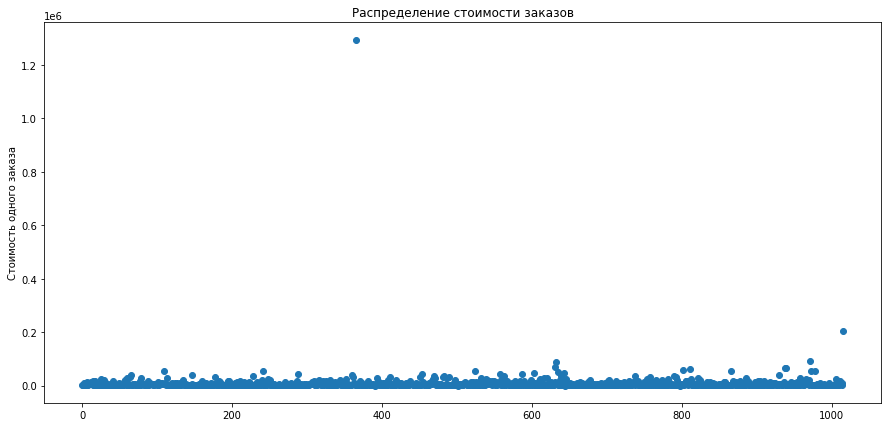

In [29]:
# задаем значение оси х
x_values = pd.Series(range(0,len(orders)))

#задаем размер графика
plt.figure(figsize=(15, 7))

# построим точечный график
plt.scatter(x_values, orders['revenue']) 

plt.title('Распределение стоимости заказов')


plt.ylabel('Стоимость одного заказа')
    
plt.show()


По графику видно что большинство заказов находятся в диапазон от 0 до 50 000. На графики видны явные выбросы. 

Сделаем расчет 95-го и 99-го процентилей стоимости заказа для определения аномальных значений. 

In [30]:
# 95,99 перцентили стоимости заказа
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

95 % всех заказов не превышают стоимость в 26785  и 99% заказаов не более 53904. Определим стоимость одного заказа в 50000 для отсечения аномальных заказов. 

**Вывод:** 

На точечных графиках распределения стоимости заказа и количества заказов на одного пользователя явно видны аномальные значения, которые необходимо учесть в дальнейших расчетах при проверки гипотез. 

Сделав расчет 95-го и 99-го процентилей можно сделать вывод:

- 95 % всех клиентов имеют не больше 1 заказа и 99% клиентов заказывали не более 2-х раз. Определим количество заказов не более 2 для отсечения аномальных пользователей.

- 95 % всех заказов не превышают стоимость в 26785 и 99% заказаов не более 53904. Определим стоимость одного заказа в 50 000 для отсечения аномальных заказов. 


### Анализ А/B теста.


Посчитаем статистическую значимость различий в среднем количестве заказов  на посетителя и в среднем чеке заказа между группами по «сырым» данным. Посчитаем статистическую значимость различий в среднем количестве заказов  на посетителя и в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы. 

#### Cтатистическая значимость различий по первоначальным данным

Посчитаем сначала статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы:

Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза: различия в среднем количестве заказов между группами есть

In [31]:
# отделяем данные о посещениях по группе A
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# кумулятивное число посещений по группе A
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# отделяем данные о посещениях по группе В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# кумулятивное число посещений по группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# отделяем данные о заказах по группе A, считаем число заказов и выручку по датам
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# кумулятивное число заказов и выручка по группе A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_a_cummulative.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

# отделяем данные о заказах по группе В, считаем число заказов и выручку по датам
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# кумулятивное число заказов и выручка по группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x:orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_b_cummulative.columns = ['date','orders_cummulative_b','revenue_cummulative_b']

#соединям данные в одну таблицу
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [32]:
# число совершённых заказов пользователей группы А
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

# число совершённых заказов пользователей группы В
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders'] 

In [33]:
# критический уровень статистической значимости
alpha = 0.05

# выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль для группы А
sampleA = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль для группы В
sampleB = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#p_value проверка критерием Манна-Уитни
display ('P_value:' "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# относительный прирост среднего числа заказов группы B
display ('Oтносительный прирост среднего числа заказов группы B:'"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    display ('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

'P_value:0.011'

'Oтносительный прирост среднего числа заказов группы B:0.160'

'Отвергаем нулевую гипотезу: между долями есть значимая разница'

По "сырым" данным отвергаем нулевую гипотезу. Различия в среднем количестве заказов между группами есть. Прирост заказов в группе Б составляет 16 %.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [34]:
# статистическая значимость различий в среднем чеке, передадим критерию Манна-Уитни данные о выручке с заказов. 
pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
display('P_value:''{0:.3f}'.format(pvalue))

#относительные различия в среднем чеке между группами
display('Oтносительный прирост среднего чека группы B:''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 
      
if pvalue < alpha:
    display('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')      

'P_value:0.829'

'Oтносительный прирост среднего чека группы B:0.287'

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

По "сырым" данным не можем отвергуть нулевую гипотезу и считать, что в среднем чеке есть различия, p-value значительно больше 0.05. 

Значение относительного прироста среднего чека группы B 28,7% не является статистически значимым и возможно связано с аномальными выбросами и на очищенных данным разница будет не так велика.

**Вывод:**

- по "сырым" данным  отвергаем  гипотезу, что нет различий в среднем количестве заказов между группами. Среднее количество заказов в группе Б выше.
- по "сырым" данным не можем отвергнуть гипотезу что в среднем чеке есть различия между группами, хотя средний чек группы B значительно выше среднего чека группы A.

#### Cтатистическая значимость различий по "очищенным" данным.

Посчитаем сначала статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Сформулируем гипотезы:

Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза: различия в среднем количестве заказов между группами есть

Подготовим данные. Примемх за аномальных пользователей тех, кто совершил больше 3 заказов или совершил заказ дороже 50 000 рублей.

In [35]:
# выберем анамальных пользователй по числу заказов
users_many_orders = pd.concat(
    [
         orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
         orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

# выберем анамальных пользователй по стоимости заказа
users_expensive_orders = orders[orders['revenue'] > 50000]['visitor_id']
abnormal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# узнаем число пользователей.
display(abnormal_users.head(5))
display(abnormal_users.shape[0]) 

1099    148427295
33      249864742
58      611059232
1137    759473111
949     887908475
Name: visitor_id, dtype: int64

22

Всего 22 аномальных пользователей.

In [36]:
# выборка количества заказов по пользователям по группе А без аномальных пользователей
sample_a_filtered = pd.concat(
    [
         orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# выборка количества заказов по пользователям по группе В без аномальных пользователей
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

# #p_value проверка критерием Манна-Уитни
result_orders = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

display('P_value:''{0:.3f}'.format(result_orders))

# относительный прирост среднего числа заказов группы B
display('Oтносительный прирост среднего числа заказов группы B:''{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

if result_orders < alpha:
    display('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')   

'P_value:0.006'

'Oтносительный прирост среднего числа заказов группы B:0.198'

'Отвергаем нулевую гипотезу: между долями есть значимая разница'

Также, как и по "сырым" данным, отвергаем нулевую гипотезу. Различия в среднем количестве заказов по "очищенным" данным между группами есть. Результат по очищенным данным более убедительно показывает разницу, p_value 0.006 меньше, чем по сырым данным 0.011. Прирост заказов в группе Б также выше по очищенным данным и составляет 19,8 %.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем гипотезы.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть

In [37]:
# статистическая значимость различий в среднем чеке, передадим критерию Манна-Уитни данные о выручке с заказов, исключив анамольных пользователей
result_revenue = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )]['revenue'],
                orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )]['revenue'])[1]

display('P_value:''{0:.3f}'.format(result_revenue))

#относительные различия в среднем чеке между группами
display('Oтносительный прирост среднего чека группы B:'"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

if result_revenue < alpha:
    display('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')   

'P_value:0.939'

'Oтносительный прирост среднего чека группы B:0.011'

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

Не можем отвергнуть нулевую гипотезу о различии в средних чеках между группами по очищенным "данным".

По очищенным данным данные теста выглядят более убедительно, p-value выше (0.819 против 0.729), а разница между чеками всего 1,1 %, если исключить аномальные заказы. Такая разницы не является статистически значимой, чтобы отвергнуть нулевую гипотезу.

**Вывод:**

В результате проверки гипотез по "сырым" и "очищенным" данным были получены одинаковые результаты:

- среднее количество заказов выше в группе В, на 19,8% по очищенным данным. Отвергаем гипотезу о равенстве среднего количества заказов в группах.
- различий в среднем чеке между группами нет, не можем отвергнуть нулевую гипотезу о равенстве средних чеков. Если очистить данные о выбросах, разница между средними чеками состаляет 1,1 % и вероятность получить выше средний чек в группе В может быть просто случайностью. 

### Общий вывод.

Была проведена приоритезация и проверка гипотез для увеличения выручки

**Цель исследования:** приоритизировать гипотезы, проанализировать результаты А/B теста для увеличения выручки. 

**Имеющиеся данные:** 9 гипотез по увеличению выручки интернет-магазина, результаты А/B теста.

**На этапе предобработке данных:**

Данные проверены, дубликатов и пропусков нет. Типы данных приведены к нужному формату. Исправлены наименование столбцов.
Возможны аномальные значения выручки, на которые нужно обратить внимания при дальнейшем анализе.

В группах А и В обнаружено 58 пересекающихся пользователей, что составляет 5,62%. Несмотря на то, что это большое количество пользователей, их данные были удалены. Так как они работали с обоими версиями интернет-магазина в ходе одного исследования, неизвестно, какая именно повлияла на их решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.


**Приоритезация гипотез:**

Были расчитаны:

- ICE SCORE. По результатам приоритетны для проверки гипотезы 8, 0 и 7.
- RICE SCORE. По результатам приоритетны для проверки гипотезы 7, 2 и 0.


По результатам двух оценок, приоритетной для проверки можно посчитать гипотезу 7, она имеет высокие показатели силы изменений, степени уверенности в том, что гипотеза верна и высокую долю пользователей, которых изменения затронут. При этом сложность проверки гипотезы средняя. 

**Расчет кумулятивных метрик:**

У группы В кумулятивная средняя выручка, средний чек и количество заказов выше, чем у группы А. При этом графики выручки и количества заказов стабилизировались. График среднего чека имеет колебанияю, вероятно связанные с аномально крупными заказами. Необходимо провести анализ выбросов и аномальных значений.

**Анализ выбросов:**

- 95 % всех клиентов имеют не больше 1 заказа и 99% клиентов заказывали не более 2-х раз. Определим количество заказов не более 2 для отсечения аномальных пользователей.

- 95 % всех заказов не превышают стоимость в 26785 и 99% заказаов не более 53904. Определим стоимость одного заказа в 50 000 для отсечения аномальных заказов.  

**Анализ А/В теста:**

В результате проверки гипотез по "сырым" и "очищенным" данным были получены одинаковые результаты:

- среднее количество заказов выше в группе В, на 19,8% по очищенным данным. Отвергаем гипотезу о равенстве среднего количества заказов в группах.
- различий в среднем чеке между группами нет, не можем отвергнуть нулевую гипотезу о равенстве средних чеков. Если очистить данные о выбросах, разница между средними чеками состаляет 1,1 % и вероятность получить выше средний чек в группе В может быть просто случайностью.

**Рекомендуется:** остановить тест, признать победу группы В. Графики показвают стабильность показателей по количеству пользователей и выручке. Несмотря на отсутствие разницы в среднем чеке, так как цель был рост выручки, это достигается за счет роста числа пользоватлей при сохранении уровня среднего чека. 
Рекомендуется проверить, как происходит деление трафика. В связи с удалением части данных, результаты могут быть искажены.

